### Importing neccessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Loading the dataset 

In [4]:
df=pd.read_csv("/Users/sangameshgoudahorapeti/Downloads/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Shape of the dataset

In [5]:
#shape of the dataset

In [6]:
df.shape

(4521, 17)

###  Datatypes of all the feature

In [7]:
#datatypes of all the feature

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Checking the missing values

In [9]:
missing_data = pd.DataFrame(df.isnull().sum(), columns = ["Count"])
missing_data["Percentage"] = missing_data["Count"]/len(df) *100
missing_data

,Count,Percentage
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
balance,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
day,0,0.0


### Check for duplicates

In [10]:
df.duplicated().sum()

0

###  Summary of the dataset

summary of the numerical columns

In [11]:

df.describe(include=np.number)

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


summary of the categorical columns

In [12]:
df.describe(exclude=np.number)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


### Renaming the Dependent varible column 

In [13]:
#renaming the dependent varibale column

In [14]:
df.rename(columns={"y":"Deposit"},inplace=True)

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Deposit'],
      dtype='object')

### Target columns need to map 

Before mapping

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [17]:
df["Deposit"] = df["Deposit"].apply(lambda x: 0 if x=='no' else 1)

After mapping

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [19]:
# unique value in boolean type features

print(df['default'].unique())
print(df['housing'].unique())
print(df['loan'].unique())
print(df['Deposit'].unique())

['no' 'yes']
['no' 'yes']
['no' 'yes']
[0 1]


### univariate analysis

In [20]:
#numerical varibale columns
df_num=df.select_dtypes(include=np.number)
df_num.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'Deposit'],
      dtype='object')

#### age  

In [21]:
df["age"].max()

87

In [22]:
df["age"].min()

19

range of age is  19 and 87

In [23]:
df['age'].describe()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

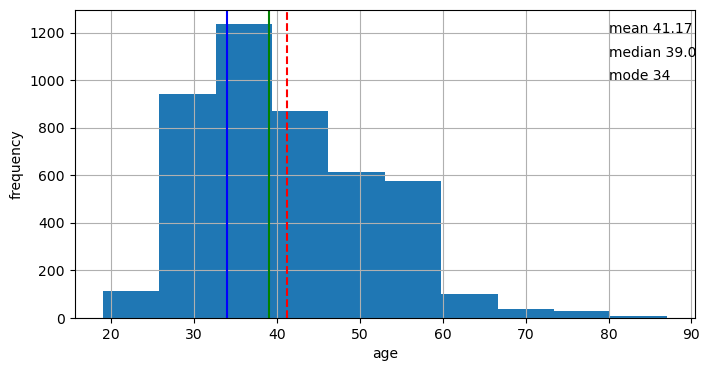

In [24]:
# histogram
plt.figure(figsize=(8,4))
df['age'].hist()
plt.xlabel('age')
plt.ylabel('frequency')

plt.axvline(df['age'].mean(), color='r', linestyle='--')
plt.axvline(df['age'].median(), color='g', linestyle='-')
plt.axvline(df['age'].mode()[0], color='b', linestyle='-')


plt.text(80,1200, 'mean'+' '+str(round(df['age'].mean(),2)))
plt.text(80,1100, 'median'+' '+str(round(df['age'].median(),2)))
plt.text(80,1000, 'mode'+' '+str(round(df['age'].mode()[0],2)))


plt.show()

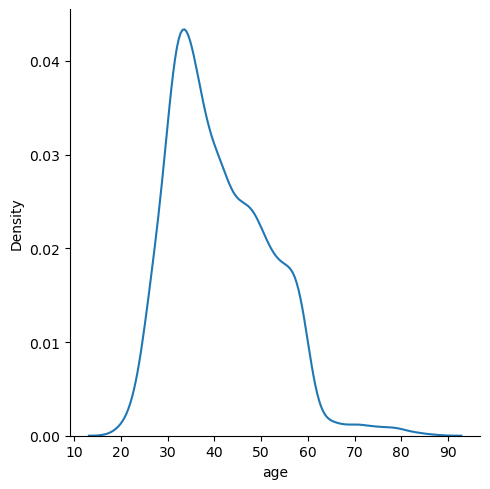

In [25]:
# kde
sns.displot(df['age'], kind='kde')

<Axes: >

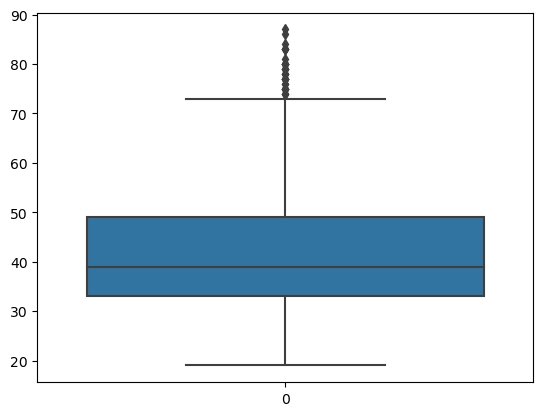

In [26]:
sns.boxplot(df["age"])

From age boxplot we can make two categories like 18-70 and 70+ for feature engineering if model needs in future.

In [27]:
print('skewness :',df['age'].skew())
print('---------')
print('kurtosis :', df['age'].kurt())

skewness : 0.6995014533559305
---------
kurtosis : 0.3487754872611486


max clients are from age group of 25 to 60.
can say after 60 are retired people.
from skew value we can infer that it is +ve skewed and from kurt i.e. +ve which means it is leptokurtic( presence of more extreme observations)

In [28]:
df_num.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'Deposit'],
      dtype='object')

#### Balance 

In [29]:
df['balance'].describe()

count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64

In [30]:
df[df['balance']<=0].shape

(723, 17)

* we have 723 clients who have balance either 0 or less than 0 from which we can assume either it is dormant accound or been penalised by bank.

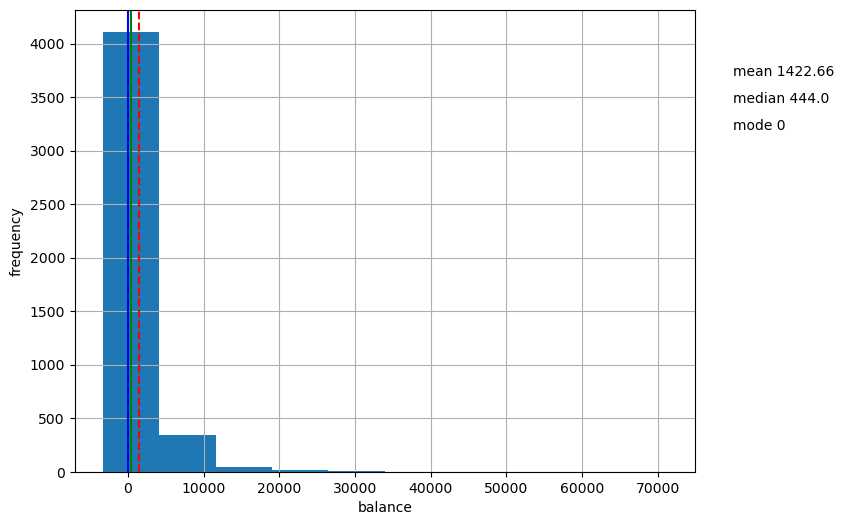

In [31]:
plt.figure(figsize=(8,6))
df['balance'].hist()
plt.xlabel('balance')
plt.ylabel('frequency')

plt.axvline(df['balance'].mean(), color='r', linestyle='--')
plt.axvline(df['balance'].median(), color='g', linestyle='-')
plt.axvline(df['balance'].mode()[0], color='b', linestyle='-')


plt.text(80000,3700, 'mean'+' '+str(round(df['balance'].mean(),2)))
plt.text(80000,3450, 'median'+' '+str(round(df['balance'].median(),2)))
plt.text(80000,3200, 'mode'+' '+str(round(df['balance'].mode()[0],2)))

plt.show()

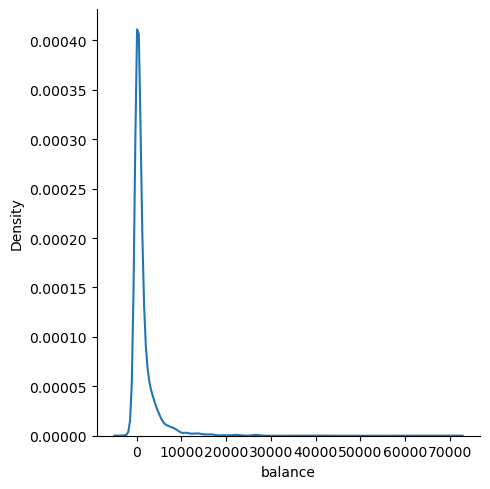

In [32]:
sns.displot(df['balance'], kind='kde')

<Axes: >

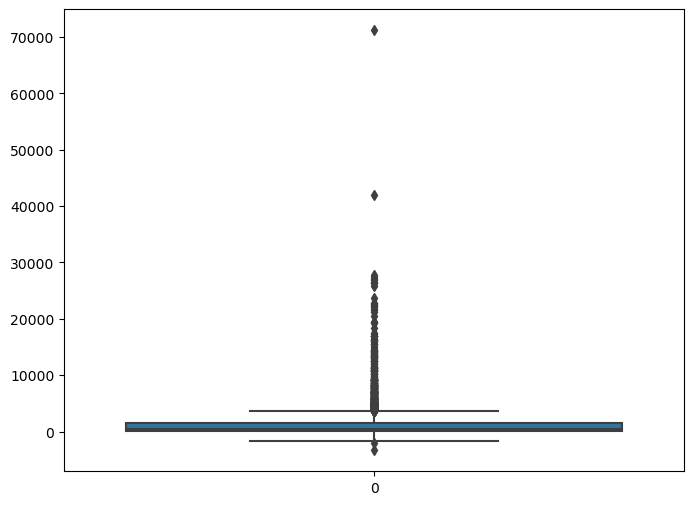

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(df['balance'])

In [34]:
print('skewness :',df['balance'].skew())
print('--------')
print('kurtosis :',df['balance'].kurt())
print('--------')
print('standard deviation :', df['balance'].std())

skewness : 6.596430546295735
--------
kurtosis : 88.39033211861796
--------
standard deviation : 3009.6381424673496


from skew value we can infer that it is +ve skewed and from kurt i.e. +ve which means it is leptokurtic( presence of more extreme observations) & there is lot of variation.

In [35]:
df_num.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'Deposit'],
      dtype='object')

#### Day 

In [36]:
df["day"].describe()

count    4521.000000
mean       15.915284
std         8.247667
min         1.000000
25%         9.000000
50%        16.000000
75%        21.000000
max        31.000000
Name: day, dtype: float64

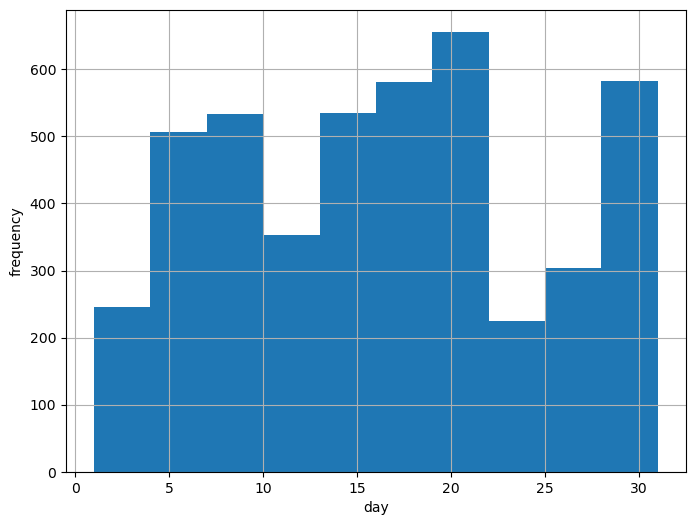

In [37]:
plt.figure(figsize=(8,6))
df['day'].hist()
plt.xlabel('day')
plt.ylabel('frequency')
plt.show()

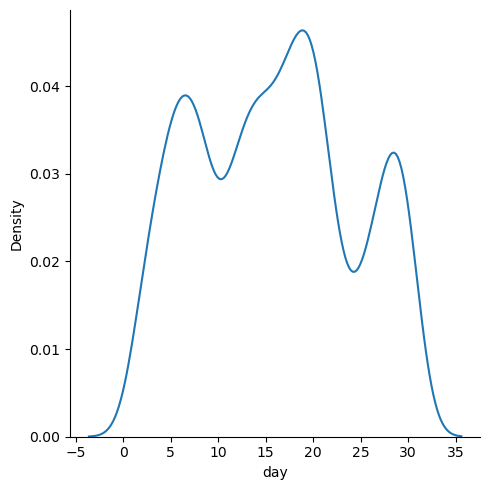

In [38]:
sns.displot(df["day"],kind ="kde")

#### Duration 

In [39]:
df['duration'].describe()

count    4521.000000
mean      263.961292
std       259.856633
min         4.000000
25%       104.000000
50%       185.000000
75%       329.000000
max      3025.000000
Name: duration, dtype: float64

In [40]:
df[df['duration']==3025]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Deposit
568,59,unemployed,married,primary,no,0,no,no,cellular,30,jan,3025,2,-1,0,unknown,0


In [41]:
df[df["duration"]==4]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Deposit
1116,28,management,married,tertiary,no,318,yes,no,unknown,27,may,4,4,-1,0,unknown,0


here duration means that they are new customer for current campaign.

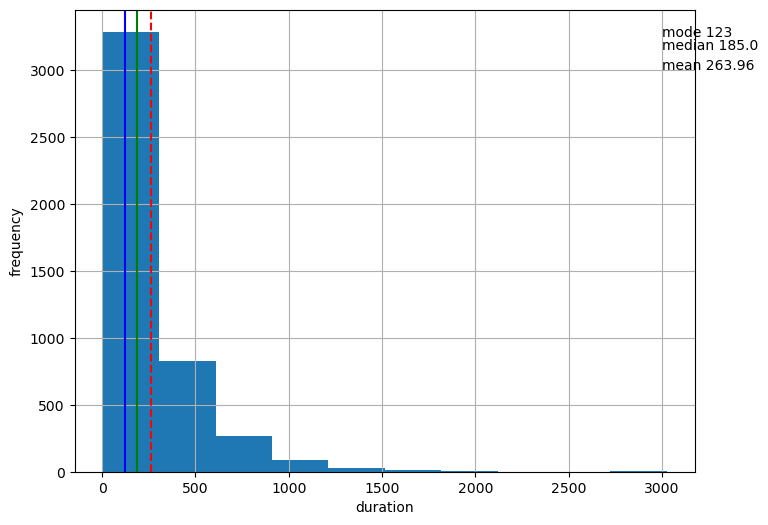

In [42]:
plt.figure(figsize=(8,6))
df['duration'].hist()
plt.xlabel('duration')
plt.ylabel('frequency')

plt.axvline(df['duration'].mean(), color='r', linestyle='--')
plt.axvline(df['duration'].median(), color='g', linestyle='-')
plt.axvline(df['duration'].mode()[0], color='b', linestyle='-')


plt.text(3000,3000, 'mean'+' '+str(round(df['duration'].mean(),2)))
plt.text(3000,3150, 'median'+' '+str(round(df['duration'].median(),2)))
plt.text(3000,3250, 'mode'+' '+str(round(df['duration'].mode()[0],2)))

plt.show()

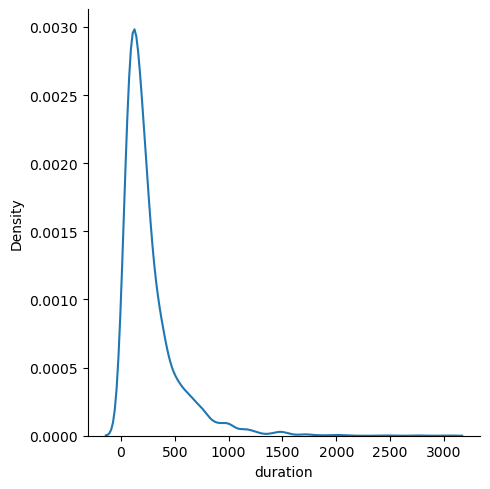

In [43]:
sns.displot(df["duration"],kind="kde")

<Axes: >

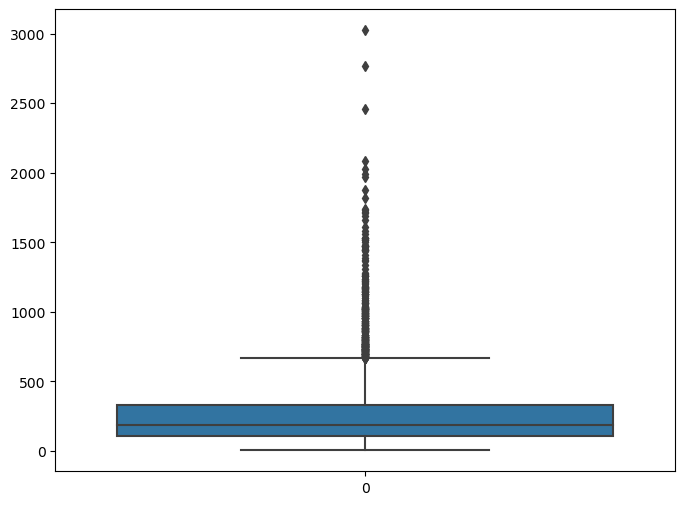

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(df['duration'])

 There are outliers in the duration feature

In [45]:
print('skewness :',df['duration'].skew())
print('--------')
print('kurtosis :',df['duration'].kurt())
print('--------')
print('standard deviation :', df['duration'].std())

skewness : 2.7724197169136455
--------
kurtosis : 12.530049737749446
--------
standard deviation : 259.85663262468245


right skewed, kurtosis is +ve means presence of extreme observation & deviation is also present in 'duration'

#### campaign

number of contacts performed during this campaign and for this client (numeric, includes last contact)

In [46]:
df["campaign"].describe()

count    4521.000000
mean        2.793630
std         3.109807
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        50.000000
Name: campaign, dtype: float64

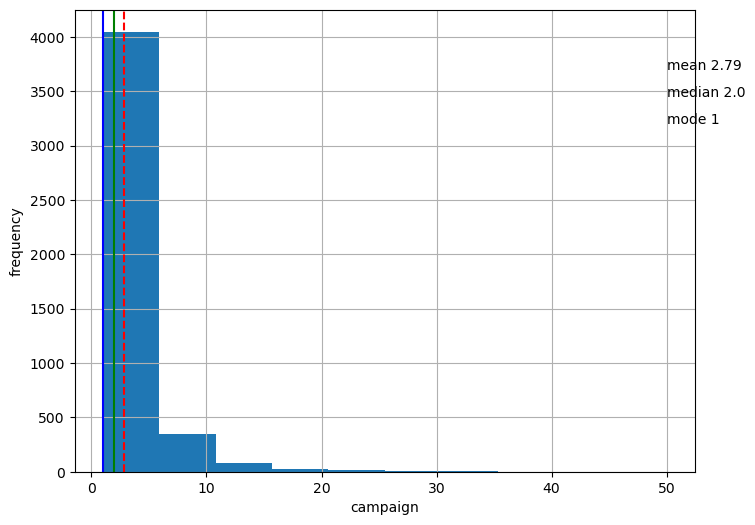

In [47]:
plt.figure(figsize=(8,6))
df['campaign'].hist()
plt.xlabel('campaign')
plt.ylabel('frequency')

plt.axvline(df['campaign'].mean(), color='r', linestyle='--')
plt.axvline(df['campaign'].median(), color='g', linestyle='-')
plt.axvline(df['campaign'].mode()[0], color='b', linestyle='-')


plt.text(50,3700, 'mean'+' '+str(round(df['campaign'].mean(),2)))
plt.text(50,3450, 'median'+' '+str(round(df['campaign'].median(),2)))
plt.text(50,3200, 'mode'+' '+str(round(df['campaign'].mode()[0],2)))

plt.show()

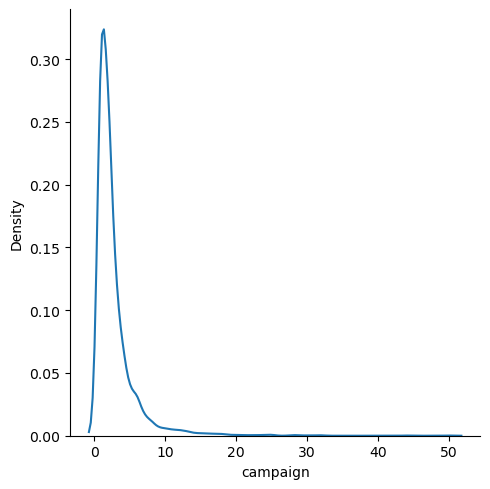

In [48]:
sns.displot(df["campaign"],kind="kde")

In [49]:
print('skewness :',df['campaign'].skew())
print('--------')
print('kurtosis :',df['campaign'].kurt())
print('--------')
print('standard deviation :', df['campaign'].std())

skewness : 4.74391446894159
--------
kurtosis : 37.168920102993624
--------
standard deviation : 3.1098066601886134


right skewed, kurt is also +ve means presence of extreme observation & standard deviation is normal

<Axes: >

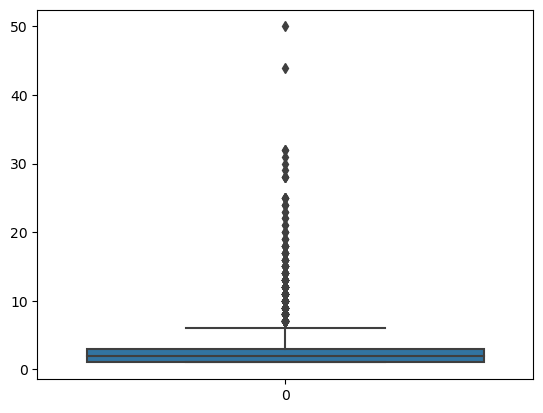

In [50]:
sns.boxplot(df['campaign'])

There are outlier in campaign column

In [51]:
df_num.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'Deposit'],
      dtype='object')

#### Pdays 

In [52]:
df["pdays"].describe()

count    4521.000000
mean       39.766645
std       100.121124
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       871.000000
Name: pdays, dtype: float64

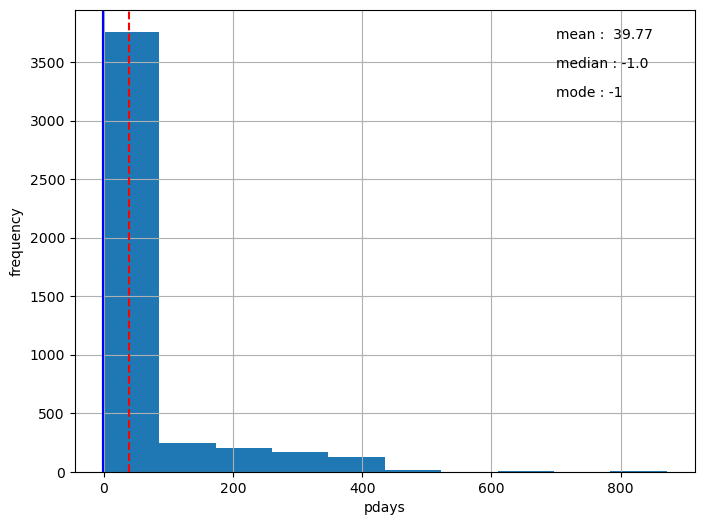

In [53]:
plt.figure(figsize=(8,6))
df['pdays'].hist()
plt.xlabel('pdays')
plt.ylabel('frequency')

plt.axvline(df['pdays'].mean(), color='r', linestyle='--')
plt.axvline(df['pdays'].median(), color='g', linestyle='-')
plt.axvline(df['pdays'].mode()[0], color='b', linestyle='-')


plt.text(700,3700, 'mean : '+' '+str(round(df['pdays'].mean(),2)))
plt.text(700,3450, 'median :'+' '+str(round(df['pdays'].median(),2)))
plt.text(700,3200, 'mode :'+' '+str(round(df['pdays'].mode()[0],2)))

plt.show()
plt.show()

when we go through the data set thoroughy we noticed that pdays has value -1 which is in around 3700 observation. Which is not giving any insight because number of  days cant be in negative. So, i consider it as anomaly which is being treated in feature engineering.

<Axes: xlabel='pdays', ylabel='Density'>

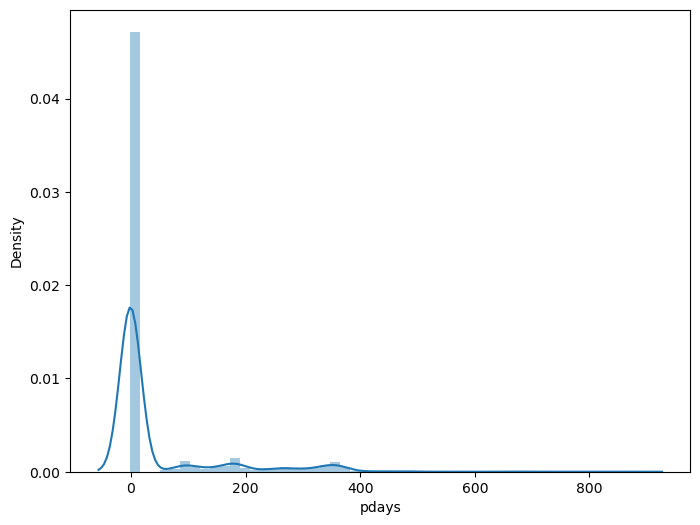

In [54]:
plt.figure(figsize=(8,6))
sns.distplot(df['pdays'])

In [55]:
print('skewness :',df['pdays'].skew())
print('--------')
print('kurtosis :',df['pdays'].kurt())
print('--------')
print('standard deviation :', df['pdays'].std())

skewness : 2.71707136656418
--------
kurtosis : 7.957127901823425
--------
standard deviation : 100.12112444301869


very high deviation,  highly right skewed and kurt is +ve means presence of extreme observation.

<Axes: >

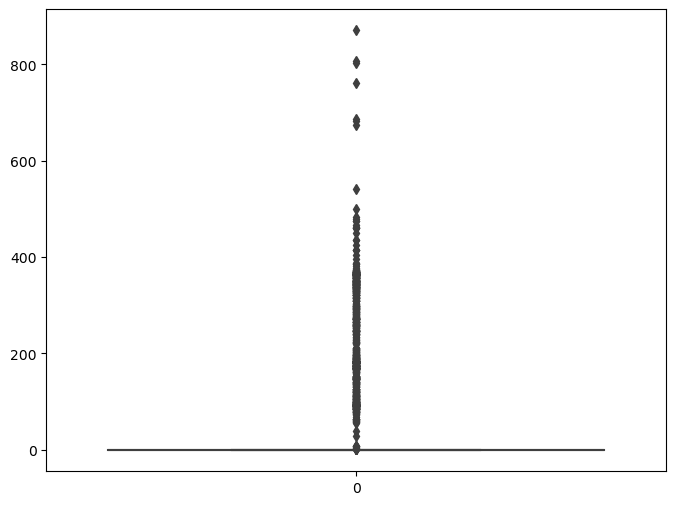

In [56]:
plt.figure(figsize=(8,6))
sns.boxplot(df['pdays'])

In Pdays column there are lot of outliers


### Univariate analysis for Boolean datatype categories like default , housing , loan , Deposit

####  default 

default: has credit in default? (categorical: 'no','yes')

In [57]:
df['default'].value_counts()

default
no     4445
yes      76
Name: count, dtype: int64

<Axes: ylabel='count'>

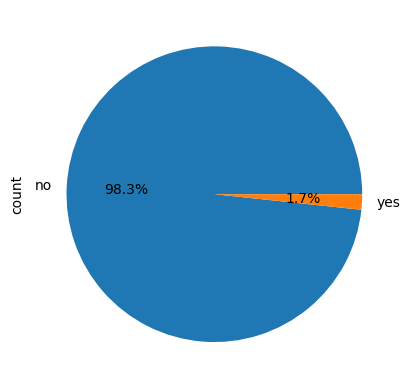

In [58]:
df.default.value_counts().plot(kind='pie',autopct="%.1f%%")

**1.8%** customer has default in credit.

### housing 

In [59]:
df['housing'].value_counts()

housing
yes    2559
no     1962
Name: count, dtype: int64

<Axes: ylabel='count'>

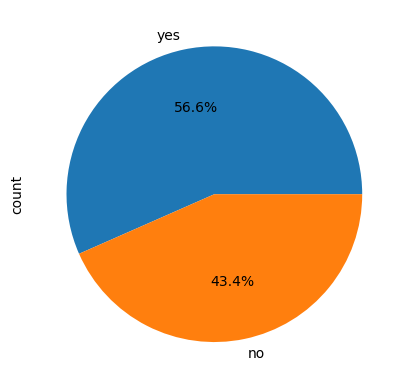

In [60]:
df.housing.value_counts().plot(kind='pie',autopct="%.1f%%")

**56.6%** with housing loan.
**44.4%** with no housing loan.

### Loan 

In [61]:
df['loan'].value_counts()

loan
no     3830
yes     691
Name: count, dtype: int64

<Axes: ylabel='count'>

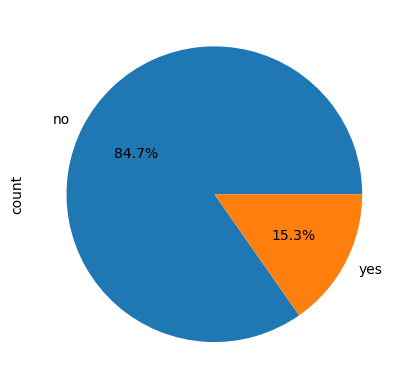

In [62]:
df.loan.value_counts().plot(kind='pie',autopct="%.1f%%")

**15.3%** have personal loan.
**84.7%** have no personal loan.

### Target(Deposit) 

In [63]:
df['Deposit'].value_counts()

Deposit
0    4000
1     521
Name: count, dtype: int64

<Axes: ylabel='count'>

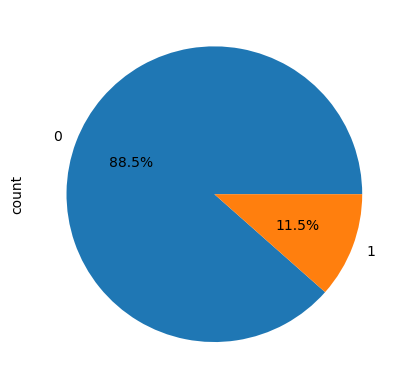

In [64]:
df.Deposit.value_counts().plot(kind='pie',autopct="%.1f%%")

Data is not balanced, we can see here that **88.5** % goes to 0(No) and **11.5%** goes to 1(Yes) 

### Univariate analysis for categorical features 

In [65]:
df_cat=df.select_dtypes(include="object")
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

####  Job

<Axes: ylabel='count'>

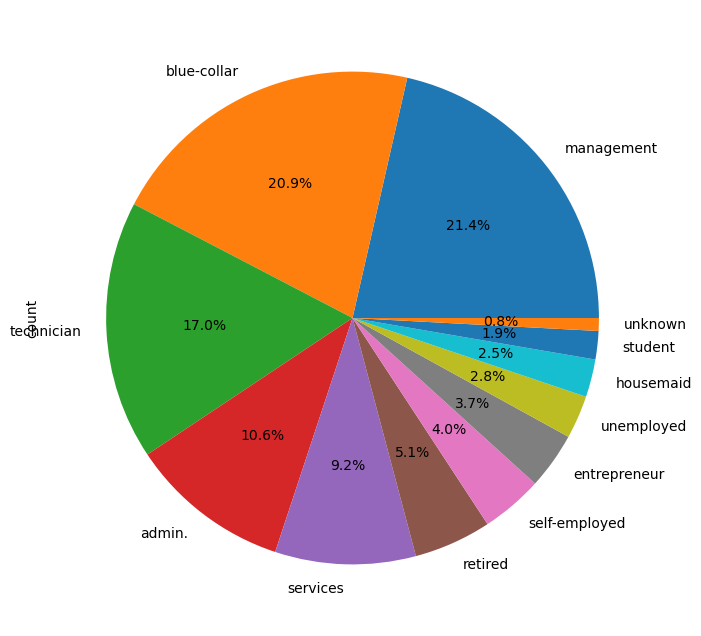

In [66]:
plt.figure(figsize=(10,8))
df.job.value_counts().plot(kind='pie',autopct="%.1f%%")

max job = managment with 21.4% fallowed by 20.9% of technician 

#### Marital

<Axes: ylabel='count'>

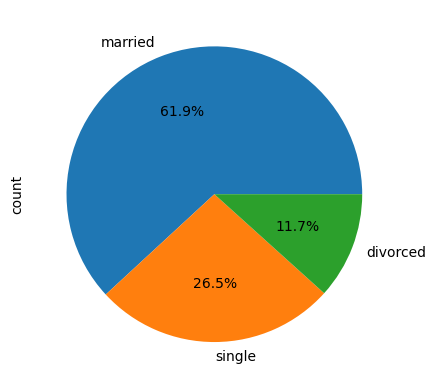

In [67]:
df.marital.value_counts().plot(kind='pie',autopct="%.1f%%")

Here we can see that **61.9%** are married, **26.5 %** people are single and remaining divorced 

###  Education

<Axes: ylabel='count'>

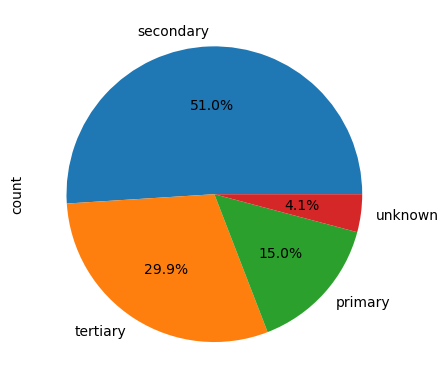

In [68]:
df.education.value_counts().plot(kind="pie",autopct= "%.1f%%")

From the above pie chart we can see that most of applicants  completed seconday education followed by tertiary

#### contact 

<Axes: ylabel='count'>

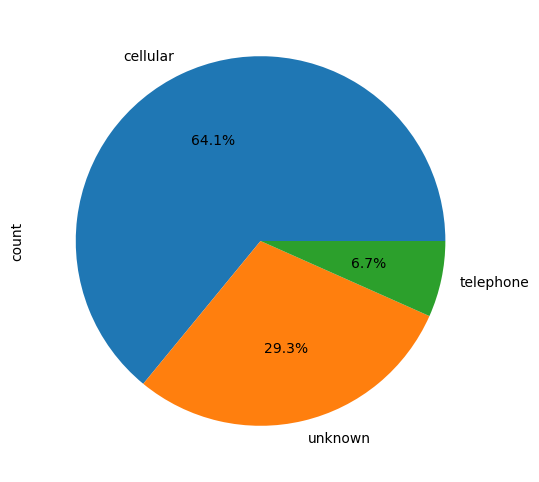

In [69]:
plt.figure(figsize = (8,6))
df.contact.value_counts().plot(kind='pie',autopct="%.1f%%")

maximum client contact is done through cellular mode i,e. 64.1%

#### month 

<Axes: ylabel='count'>

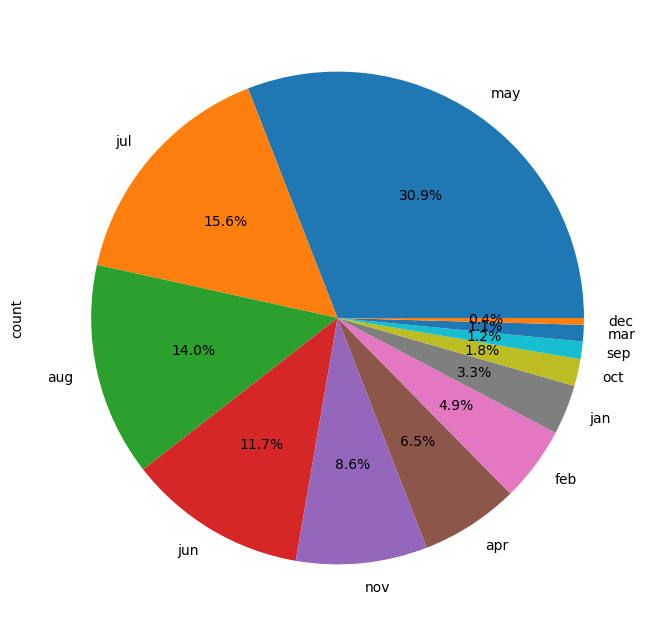

In [70]:
plt.figure(figsize = (8,8))
df.month.value_counts().plot(kind='pie',autopct="%.1f%%")

* max contact were done in month of MAY that is **30.9%** and least in december **0.4%**

### poutcome 

outcome of the previous marketing campaign(categorical: 'failure','nonexistent','success')

<Axes: ylabel='count'>

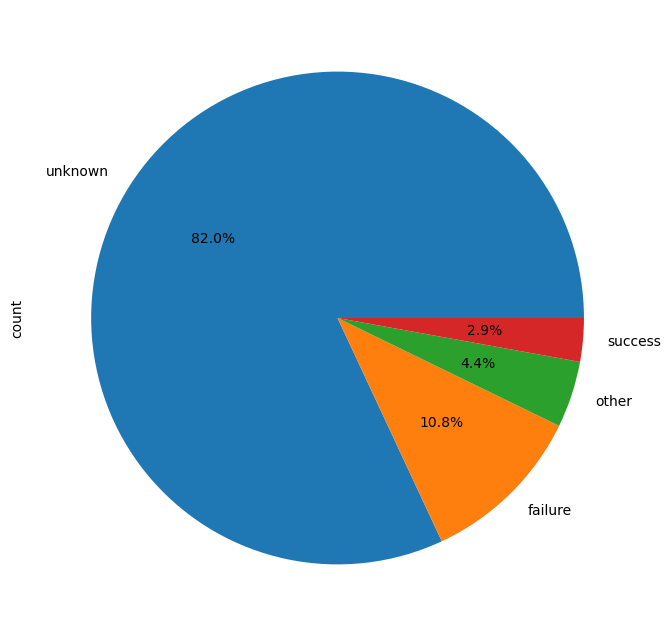

In [71]:
plt.figure(figsize = (8,8))
df.poutcome.value_counts().plot(kind='pie',autopct="%.1f%%")

'unknown' sub-category accounts for 82% we need dig deeper in perspective of financial domain. and same with the 'other' sub-category. 

### Multi-variate analysis 

<Figure size 700x400 with 0 Axes>

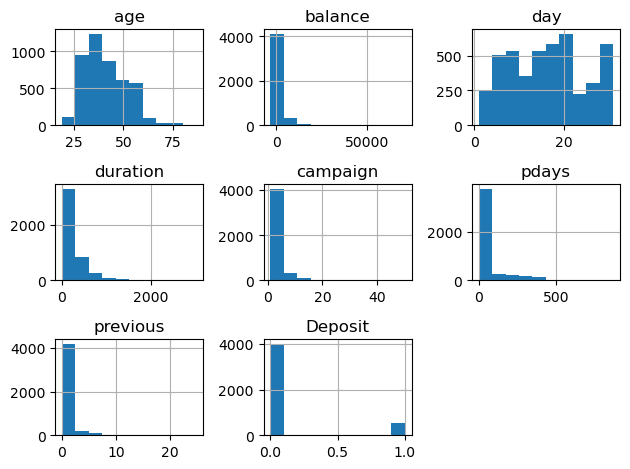

In [72]:
plt.figure(figsize=(7,4))
df.hist()
plt.tight_layout()
plt.show()

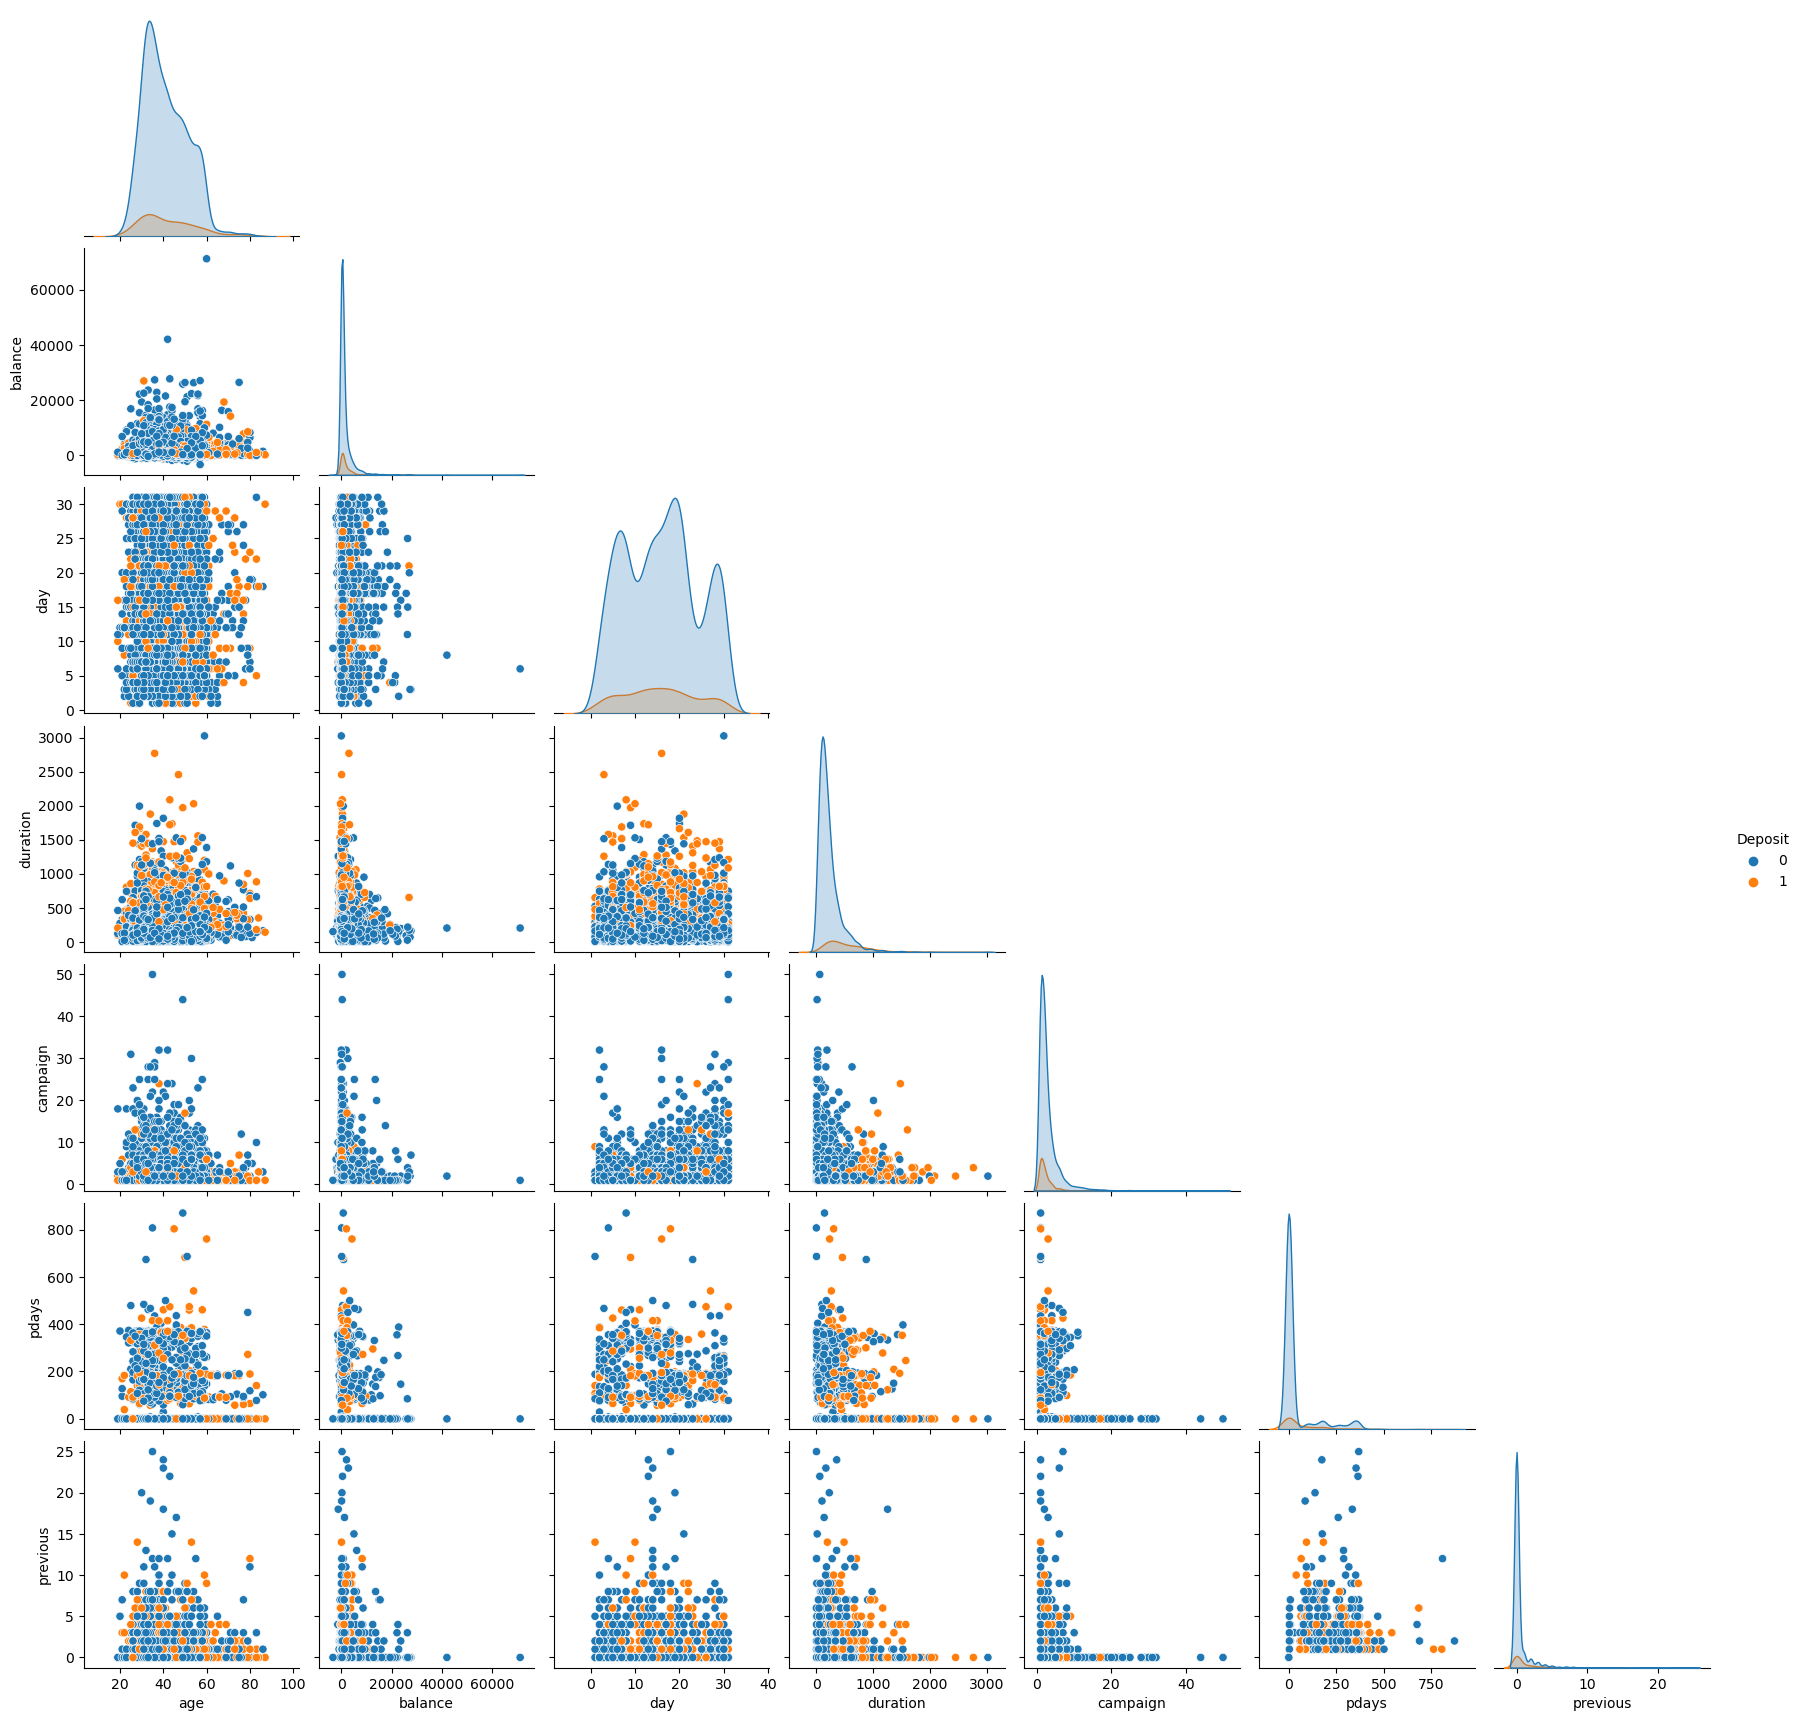

In [73]:
sns.pairplot(df, hue='Deposit', corner=True)

### Correlation 

In [74]:
correlation=df_num.corr()
correlation

,age,balance,day,duration,campaign,pdays,previous,Deposit
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.045092
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.017905
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.011244
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.401118
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.116714
Deposit,0.045092,0.017905,-0.011244,0.401118,-0.061147,0.104087,0.116714,1.000000


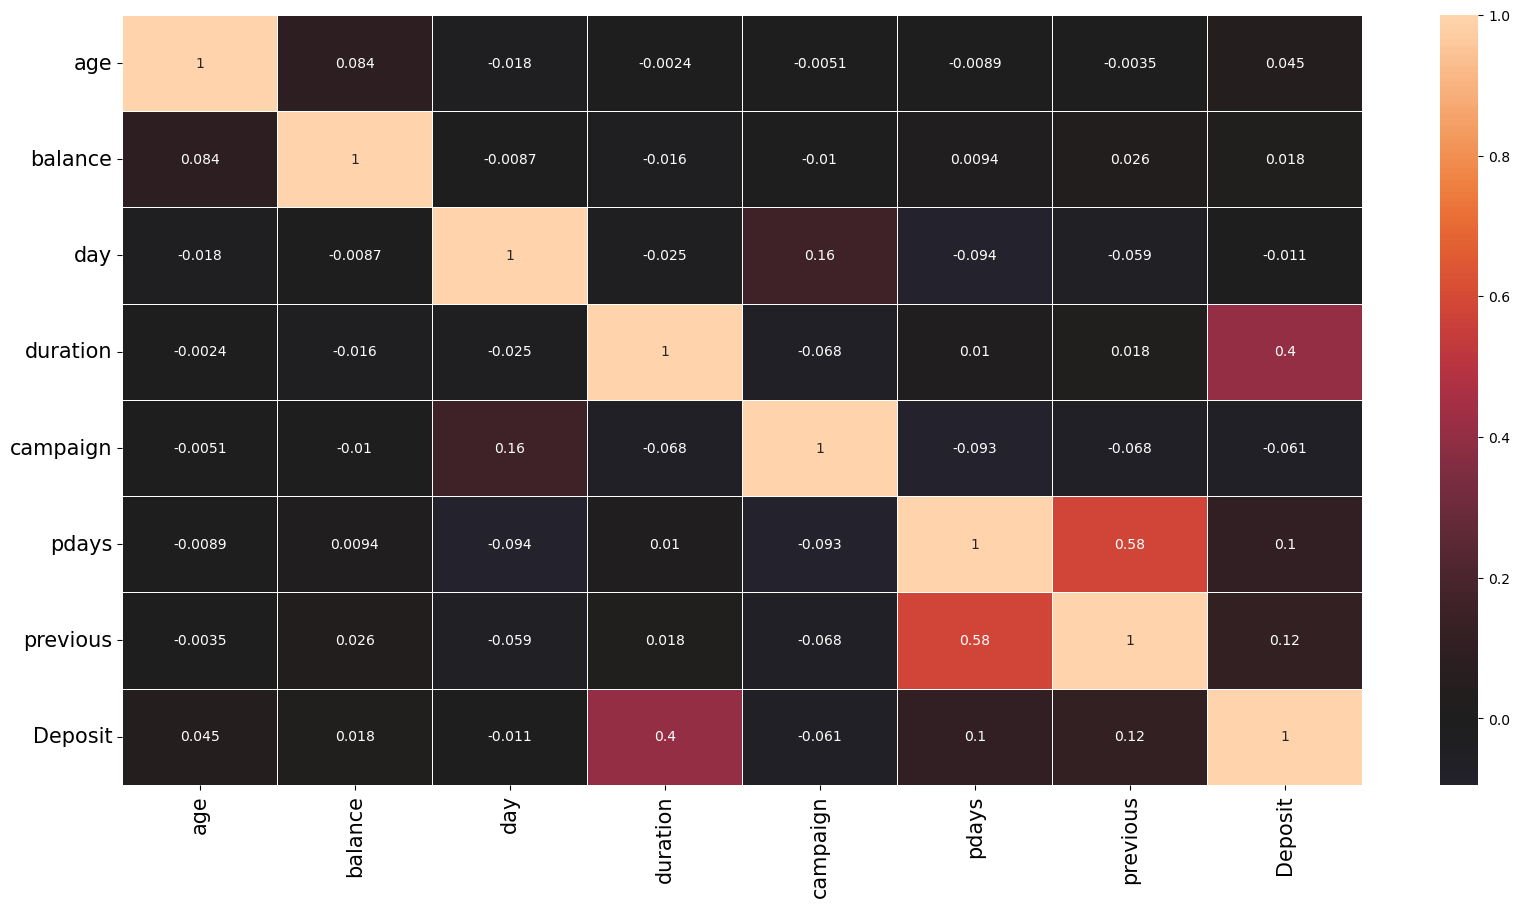

In [75]:
plt.figure(figsize=(20,10))

sns.heatmap(correlation, annot = True, linewidths=.5, center=0)

# rotation = 'horizontal' rotates the y-axis labels horizontally
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

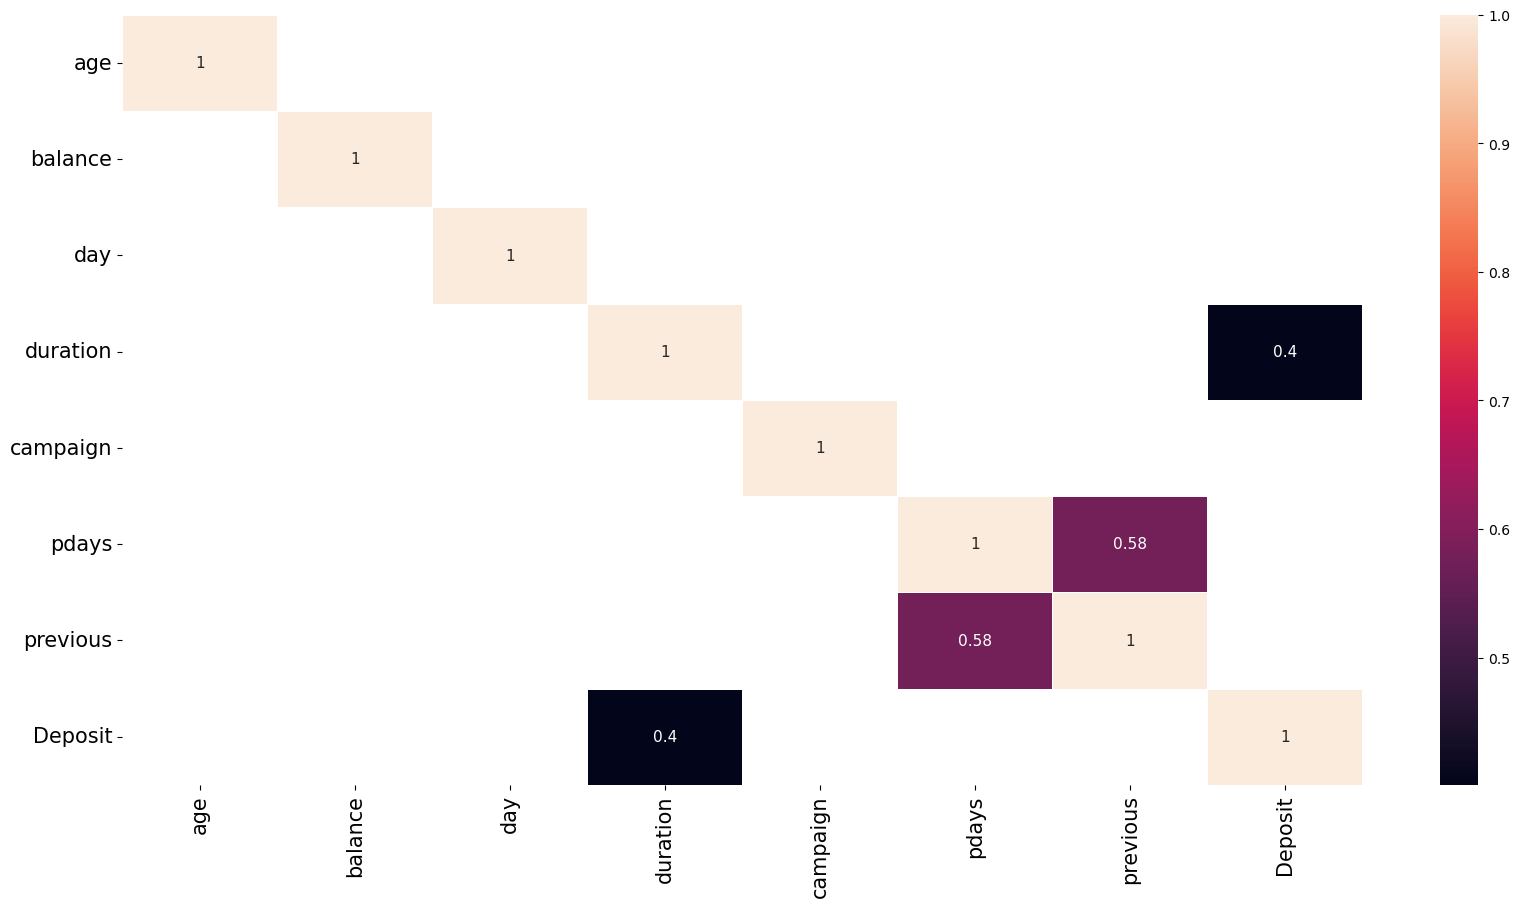

In [76]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation[np.abs(correlation) > 0.25], annot = True,linewidths=0.5, annot_kws = {"size": 11})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(rotation = 'vertical',fontsize = 15)

# display the plot
plt.show()

Duration and Deposit are most correlated and 
pdays and previous are most correlated

### Outlier Treatment 

In [77]:
from sklearn.preprocessing import PowerTransformer
PT_yj = PowerTransformer(method='yeo-johnson')

In [78]:
df[['age','balance','day','duration','campaign','pdays','previous']]=PT_yj.fit_transform(df[['age','balance','day','duration','campaign','pdays','previous']])

In [79]:
df[['age','balance','day','duration','campaign','pdays','previous']].skew()

age         0.009721
balance     1.580522
day        -0.152339
duration    0.012973
campaign    0.230771
pdays       1.665152
previous    1.664879
dtype: float64

column :  age


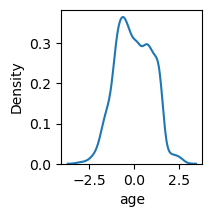

column :  balance


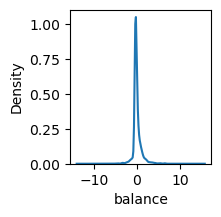

column :  day


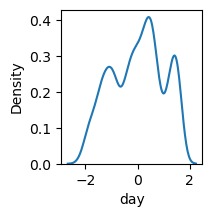

column :  duration


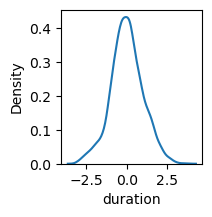

column :  campaign


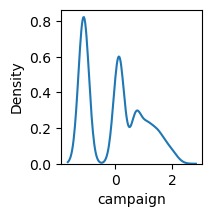

column :  pdays


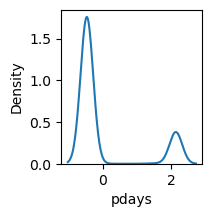

column :  previous


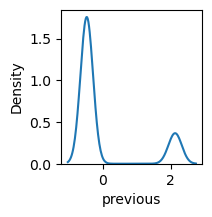

column :  Deposit


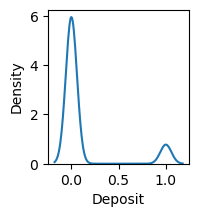

In [80]:
for i in df.select_dtypes(exclude='object').columns:
    plt.figure(figsize=(4,2))
    plt.subplot(1, 2, 1)
    print('column : ', i)
    sns.distplot(df[i], hist=False)
    plt.show()


 Here we can say that skewness is reduced

### Feature Engineering 

#### Month  

we can divide the months into 4 Quarter.

Jan - March = Q1
April - June = Q2
July - Sept = Q3
Oct -Dec = Q4

In [81]:
df['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [82]:
df['month']=df['month'].replace(['jan','feb','mar'],'Q1')
df['month']=df['month'].replace(['apr','may','jun'],'Q2')
df['month']=df['month'].replace(['jul','aug','sep'],'Q3')
df['month']=df['month'].replace(['oct','nov','dec'],'Q4')

In [83]:
df['month'].unique()

array(['Q4', 'Q2', 'Q1', 'Q3'], dtype=object)

#### Job 

In [84]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [85]:
df['job']=df['job'].replace(['management','admin.'],'White-Collar')
df['job']=df['job'].replace(['blue-collar','technician','services','housemaid'],'Blue-Collar')
df['job']=df['job'].replace(['self-employed','entrepreneur','unknown'],'Self-Emp')
df['job']=df['job'].replace(['unemployed','student','retired'],'Unemployed')

In [86]:
df["job"].unique()

array(['Unemployed', 'Blue-Collar', 'White-Collar', 'Self-Emp'],
      dtype=object)

In [87]:
df['job'].value_counts()

job
Blue-Collar     2243
White-Collar    1447
Unemployed       442
Self-Emp         389
Name: count, dtype: int64

### Day 


According to the business knowledge we can conclude that days in not significant though it is dependent with target statistically. So, we can drop it.

In [88]:
df.drop('day',axis=1, inplace=True)

In [89]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,Deposit
0,-1.140684,Unemployed,married,primary,no,0.282211,no,no,cellular,Q4,-0.888110,-1.114491,-0.469086,-0.469131,unknown,0
1,-0.743809,Blue-Collar,married,secondary,no,1.209846,yes,yes,cellular,Q2,0.166967,-1.114491,2.154063,2.184828,failure,0
2,-0.502259,White-Collar,single,tertiary,no,0.130429,yes,no,cellular,Q2,-0.023029,-1.114491,2.153496,2.044698,failure,0
3,-1.140684,White-Collar,married,tertiary,no,0.174936,yes,yes,unknown,Q2,0.056370,1.077851,-0.469086,-0.469131,unknown,0
4,1.526244,Blue-Collar,married,secondary,no,-0.445382,yes,no,unknown,Q2,0.196908,-1.114491,-0.469086,-0.469131,unknown,0


### Education 

In [90]:
df.education.value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [91]:
df['education'].mode()[0]

'secondary'

In [92]:
df['education'].replace(to_replace='unknown', value=df['education'].mode()[0], inplace=True)

In [93]:
df["education"].value_counts()

education
secondary    2493
tertiary     1350
primary       678
Name: count, dtype: int64

### pdays treatment 

In [94]:
df['pdays'].head(2)

0   -0.469086
1    2.154063
Name: pdays, dtype: float64

### encoding for categorical 

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4521 non-null   object 
 9   month      4521 non-null   object 
 10  duration   4521 non-null   float64
 11  campaign   4521 non-null   float64
 12  pdays      4521 non-null   float64
 13  previous   4521 non-null   float64
 14  poutcome   4521 non-null   object 
 15  Deposit    4521 non-null   int64  
dtypes: float64(6), int64(1), object(9)
memory usage: 565.3+ KB


In [96]:
df_features = df.iloc[:,:-1]
df_target = df.iloc[:,-1]

In [97]:
df_cat_new = df_features.select_dtypes(include='object')
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,unemployed,married,primary,no,no,no,cellular,oct,unknown
1,services,married,secondary,no,yes,yes,cellular,may,failure
2,management,single,tertiary,no,yes,no,cellular,apr,failure
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown


In [98]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming df_cat_new contains your DataFrame with categorical variables

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(df_cat_new)

# Convert the encoded data into a DataFrame
dum_var = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(df_cat_new.columns))

# Display the resulting DataFrame
print(dum_var.head())

   job_Self-Emp  job_Unemployed  job_White-Collar  marital_married  \
0           0.0             1.0               0.0              1.0   
1           0.0             0.0               0.0              1.0   
2           0.0             0.0               1.0              0.0   
3           0.0             0.0               1.0              1.0   
4           0.0             0.0               0.0              1.0   

   marital_single  education_secondary  education_tertiary  default_yes  \
0             0.0                  0.0                 0.0          0.0   
1             0.0                  1.0                 0.0          0.0   
2             1.0                  0.0                 1.0          0.0   
3             0.0                  0.0                 1.0          0.0   
4             0.0                  1.0                 0.0          0.0   

   housing_yes  loan_yes  contact_telephone  contact_unknown  month_Q2  \
0          0.0       0.0                0.0           

In [99]:
dum_var.head()

,job_Self-Emp,job_Unemployed,job_White-Collar,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_Q2,month_Q3,month_Q4,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [100]:
df_num = df_features.select_dtypes(include='number')
df_num.head()

,age,balance,duration,campaign,pdays,previous
0,-1.140684,0.282211,-0.888110,-1.114491,-0.469086,-0.469131
1,-0.743809,1.209846,0.166967,-1.114491,2.154063,2.184828
2,-0.502259,0.130429,-0.023029,-1.114491,2.153496,2.044698
3,-1.140684,0.174936,0.056370,1.077851,-0.469086,-0.469131
4,1.526244,-0.445382,0.196908,-1.114491,-0.469086,-0.469131


In [101]:
x = pd.concat([df_num,dum_var], axis=1)
y = df_target

In [102]:
x.head()

,age,balance,duration,campaign,pdays,previous,job_Self-Emp,job_Unemployed,job_White-Collar,marital_married,...,housing_yes,loan_yes,contact_telephone,contact_unknown,month_Q2,month_Q3,month_Q4,poutcome_other,poutcome_success,poutcome_unknown
0,-1.140684,0.282211,-0.888110,-1.114491,-0.469086,-0.469131,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.743809,1.209846,0.166967,-1.114491,2.154063,2.184828,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.502259,0.130429,-0.023029,-1.114491,2.153496,2.044698,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.140684,0.174936,0.056370,1.077851,-0.469086,-0.469131,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.526244,-0.445382,0.196908,-1.114491,-0.469086,-0.469131,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


### train test split 

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=10)

In [105]:
xtrain.shape

(3164, 24)

In [106]:
ytrain.shape

(3164,)

In [107]:
xtest.shape

(1357, 24)

In [108]:
ytest.shape

(1357,)

###  Model
### Logistic Regression 

In [109]:
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [110]:
x = sm.add_constant(x)

In [111]:
logreg = sm.Logit(ytrain, xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.245472
         Iterations 8


In [112]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                Deposit   No. Observations:                 3164
Model:                          Logit   Df Residuals:                     3140
Method:                           MLE   Df Model:                           23
Date:                Sun, 07 Apr 2024   Pseudo R-squ.:                  0.3196
Time:                        18:50:18   Log-Likelihood:                -776.67
converged:                       True   LL-Null:                       -1141.5
Covariance Type:            nonrobust   LLR p-value:                2.441e-139
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                     0.0188      0.078      0.240      0.810      -0.135       0.172
balance                -0.0395      0.073     -0.540      0.589      -0.183       0.104
duration        

Conclusion:

* The most important variables for predicting the likelihood of a deposit include duration, poutcome_success, poutcome_unknown, contact_unknown, loan_yes, housing_yes, marital_married, campaign, poutcome_other, job_White-Collar, and job_Unemployed. These variables have significant p-values and provide insights into factors that strongly influence the deposit decision.
* Variables like age, balance, previous, marital_single, education_secondary, education_tertiary, default_yes, contact_telephone, and month variables (Q2, Q3, Q4) have high p-values (greater than 0.05), indicating that they are not statistically significant predictors of the deposit decision in this model.

### Interpret the odds for each variable

In [113]:
df_odds=pd.DataFrame(np.exp(logreg.params),columns=['odds'])
df_odds

,odds
age,1.018996
balance,0.961277
duration,4.561831
campaign,0.842934
pdays,0.168910
previous,2.129023
job_Self-Emp,1.378234
job_Unemployed,1.785428
job_White-Collar,1.413250
marital_married,0.574077


**Interpretation:** 
    
odds_duration = 4.56, it implies that the odds of getting client subscribed a term deposit increases by factor of 4.56 due to one unit increase in the duration, keeping other variables constant.

odds_age = 1.018996, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.018996 due to one unit increase in the age, keeping other variables constant.

odds_balance = 0.961277, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.961277 due to one unit increase in the age, keeping other variables constant.

odds_campaign = 0.842934, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.842934 due to one unit increase in the campaign, keeping other variables constant.

odds_pdays = 0.168910, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.168910 due to one unit increase in the pdays, keeping other variables constant.

odds_previous = 2.129023, it implies that the odds of getting client subscribed a term deposit increases by factor of 2.129023 due to one unit increase in the previous, keeping other variables constant.

odds_job_Self_Emp = 1.378234, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.378234 due to one unit increase in the job_Self_Emp, keeping other variables constant.

odds_job_Unemployed = 1.785428, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.785428 due to one unit increase in the job_Unemployed, keeping other variables constant.

odds_job_White_Collar = 1.413250, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.164744 due to one unit increase in the job_White_Collar, keeping other variables constant.

odds_martial_married = 0.789891, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.789891 due to one unit increase in the martial_married, keeping other variables constant.

odds_martial_single = 1.085145, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.085145 due to one unit increase in the martial_single, keeping other variables constant.

odds_education_secondary = 1.085145, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.085145 due to one unit increase in the education_secondary, keeping other variables constant.

odds_education_tertiary = 1.318735, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.318735 due to one unit increase in the education_tertiary, keeping other variables constant.


odds_default_1 = 1.263305, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.263305 due to one unit increase in the default_1, keeping other variables constant.

odds_housing_1 = 0.621511, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.621511 due to one unit increase in the housing_1, keeping other variables constant.

odds_loan_1 = 0.515963, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.515963 due to one unit increase in the loan_1, keeping other variables constant.

odds_contact_telephone = 0.869454, it implies that the odds of getting client subscribed a term deposit increases by  
                factor of 0.869454 due to one unit increase in the contact_telephone, keeping other variables constant.

odds_contact_unknown = 0.301348, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.301348 due to one unit increase in the contact_unknown, keeping other variables constant.

odds_month_Q2 = 0.911006, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.911006 due to one unit increase in the month_Q2, keeping other variables constant.

odds_month_Q3 = 0.814335, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.814335 due to one unit increase in the month_Q3, keeping other variables constant.

odds_month_Q4 = 0.678597, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.965800 due to one unit increase in the month_Q4, keeping other variables constant.

odds_poutcome_other = 1.918112, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.918112 due to one unit increase in the poutcome_other, keeping other variables constant.

odds_poutcome_success = 14.039173, it implies that the odds of getting client subscribed a term deposit increases by factor of 14.039173 due to one unit increase in the poutcome_success, keeping other variables constant.

odds_poutcome_unknown = 0.071339, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.071339 due to one unit increase in the poutcome_unknown, keeping other variables constant.

### With sklearn 

In [114]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
ypred_lr = model.predict(xtest)

In [115]:
print('Train Accuracy :',  accuracy_score(ytrain, model.predict(xtrain)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest, ypred_lr))

Train Accuracy : 0.899810366624526
-- --- --- --- ---
Test Accuracy : 0.9019896831245394


* Accuracy: The amount of correct classifications / the total amount of classifications.
* The train accuracy: The accuracy of a model on examples it was constructed on.
* The test accuracy is the accuracy of a model on examples it hasn't seen.
* here accuracy of both are almost similar which is good sign.

### classification report 

In [116]:
print("Accuracy : ", accuracy_score(ytest,ypred_lr))
print('Classification Report : \n', classification_report(ytest,ypred_lr))

Accuracy :  0.9019896831245394
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      1206
           1       0.61      0.34      0.43       151

    accuracy                           0.90      1357
   macro avg       0.76      0.66      0.69      1357
weighted avg       0.89      0.90      0.89      1357



### roc curve

In [117]:
ypred_lr_prob = model.predict_proba(xtest)[:,1]

0.8828374682877007


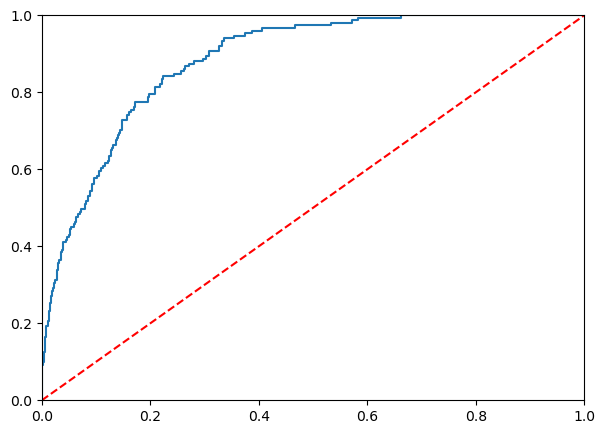

In [118]:
fpr, tpr, threshold = roc_curve(ytest,ypred_lr_prob)
plt.figure(figsize=(7,5))
# plot the ROC curve

plt.plot(fpr, tpr)


# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

print(roc_auc_score(ytest,ypred_lr_prob))
plt.show()

In [119]:
print('Accuracy : ', accuracy_score(ytest,ypred_lr))

Accuracy :  0.9019896831245394


here from all eda,feature engineering we are getting accuracy score is 90.19% but we cant rely on accuracy because of Target class distribution.

### Confusion matrix 

Specificity: It is the proportion of actual negative instances that were correctly predicted by the model. It is calculated as:

### Specificity


Specificity= 
TN+FP
TN
​
 

Specificity measures the model's ability to correctly identify negative instances.

Sensitivity (or Recall): It is the proportion of actual positive instances that were correctly predicted by the model. It is calculated as:

### Sensitivity


Sensitivity= 
TP+FN
TP
​
 

Sensitivity measures the model's ability to correctly identify positive instances.



In [120]:
cm = confusion_matrix(ytest,ypred_lr)
cm

array([[1173,   33],
       [ 100,   51]])

In [121]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print(TN)
print(FP)
print(FN)
print(TP)

1173
33
100
51


In [122]:
# RECALL for '0' class 'TNR'
specificity = TN/(TN+FP)
specificity

0.972636815920398

In [123]:
# RECALL for '1' class 'TPR'
sensitivity = TP/(FN+TP)
sensitivity

0.33774834437086093

From Classification Report we get f1-score
* for 0 class = 0.97
* for 1 class = 0.33

 Model Performance Metrics: The logistic regression model achieved a respectable level of accuracy, with an accuracy of 90.26%. Precision, recall, and F1 score indicate a balanced performance in predicting positive and negative classes, with precision at 92.5%, recall at 97%, and an F1 score of 95%. These metrics collectively suggest that the model effectively identifies both subscribed and non-subscribed instances.


Area Under Curve (AUC): The AUC of the ROC curve, which represents the model's ability to discriminate between positive and negative classes across various threshold values, was calculated to be 0.88 This indicates a high level of discriminatory power of the model.

 Confusion Matrix: The confusion matrix provides a detailed breakdown of the model's predictions, showing 1173 true negatives, 33 false positives, 100 false negatives, and 51 true positives. This breakdown allows for a deeper understanding of the model's performance across different classes.

In conclusion, the logistic regression model demonstrates strong predictive performance in identifying term deposit subscriptions. 


